## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import OrderedDict

In [3]:
model1 = nn.Sequential(OrderedDict([
    ('input', nn.Linear(2, 2)),
    ('relu', nn.ReLU()),
    ('output', nn.Linear(2, 2)),
]))

model2 = nn.Sequential(OrderedDict([
    ('input', nn.Linear(2, 4)),
    ('relu1', nn.ReLU()),
    ('hidden1', nn.Linear(4, 3)),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(3, 2)),
]))

model3 = nn.Sequential(OrderedDict([
    ('input', nn.Linear(2, 4)),
    ('relu1', nn.ReLU()),
    ('hidden1', nn.Linear(4, 8)),
    ('relu2', nn.ReLU()),
    ('hidden2', nn.Linear(8, 3)),
    ('relu3', nn.ReLU()),
    ('output', nn.Linear(3, 2)),
]))

model4 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 3)),
    ('tanh1', nn.Tanh()),
    ('hidden2', nn.Linear(3, 3)),
    ('tanh2', nn.Tanh()),
    ('output', nn.Linear(3, 2)),
]))

In [4]:
criterion = nn.MSELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

criterion4 = nn.BCEWithLogitsLoss()
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.01)


In [5]:
# Data set
data_in = torch.tensor([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]], dtype=torch.float32)

data_target = torch.tensor([
    [0, 0],
    [1, 0],
    [1, 0],
    [1, 1]], dtype=torch.float32)

In [6]:
# Train the model

def train_model(model, optimizer, criterion, data_in, data_target, num_epochs=300):
    losses = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(data_in)
        loss = criterion(outputs, data_target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        if (epoch + 1) % 30 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs} Loss: {loss.item()}")

    return loss.item(), losses

def test_model(model, data_in, data_target):
    with torch.no_grad():
        outputs = model(data_in)
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == data_target).float().mean()

        print("Input -> Predicted (raw) -> Predicted (rounded) -> Target")
        for i in range(len(data_in)):
            print(f"{data_in[i].numpy()} -> [{outputs[i,0]:.3f}, {outputs[i,1]:.3f}] -> {predicted[i].numpy()} -> {data_target[i].numpy()}")

        return accuracy.item()

In [7]:
# print model weights
def print_network_weights(model):
    print("Network Weights and Biases:")
    print("=" * 50)
    
    for name, param in model.state_dict().items():
        if 'weight' in name:
            layer_name = name.split('.')[0]
            print(f"\n{layer_name} Layer Weights:")
            print("-" * 30)
            # Convert to numpy for better formatting
            weights = param.detach().numpy()
            # For each neuron in the layer
            for i, neuron_weights in enumerate(weights):
                print(f"Neuron {i + 1}: {neuron_weights}")
                
        elif 'bias' in name:
            layer_name = name.split('.')[0]
            print(f"\n{layer_name} Layer Biases:")
            print("-" * 30)
            biases = param.detach().numpy()
            print(biases)
    
    print("\n" + "=" * 50)

In [8]:
num_epochs = 400

loss1, losses1 = train_model(model1, optimizer1, criterion, data_in, data_target, num_epochs)
accuracy1 = test_model(model1, data_in, data_target)

print("=" * 50 + "\n")

loss2, losses2 = train_model(model2, optimizer2, criterion, data_in, data_target, num_epochs)
accuracy2 = test_model(model2, data_in, data_target)

print("=" * 50)

loss3, losses3 = train_model(model3, optimizer3, criterion, data_in, data_target, num_epochs)
accuracy3 = test_model(model3, data_in, data_target)

print("=" * 50)

loss4, losses4 = train_model(model4, optimizer4, criterion4, data_in, data_target, num_epochs)
accuracy4 = test_model(model4, data_in, data_target)

Epoch 30/400 Loss: 0.15171116590499878
Epoch 60/400 Loss: 0.11869016289710999
Epoch 90/400 Loss: 0.08963309228420258
Epoch 120/400 Loss: 0.06702379882335663
Epoch 150/400 Loss: 0.05364486947655678
Epoch 180/400 Loss: 0.04731522873044014
Epoch 210/400 Loss: 0.04448968917131424
Epoch 240/400 Loss: 0.04320593923330307
Epoch 270/400 Loss: 0.042594023048877716
Epoch 300/400 Loss: 0.04229070246219635
Epoch 330/400 Loss: 0.04212779924273491
Epoch 360/400 Loss: 0.0420389287173748
Epoch 390/400 Loss: 0.04198581352829933
Input -> Predicted (raw) -> Predicted (rounded) -> Target
[0. 0.] -> [0.138, -0.175] -> [0. 0.] -> [0. 0.]
[0. 1.] -> [1.007, 0.020] -> [1. 0.] -> [1. 0.]
[1. 0.] -> [0.694, 0.354] -> [1. 0.] -> [1. 0.]
[1. 1.] -> [1.160, 0.797] -> [1. 1.] -> [1. 1.]

Epoch 30/400 Loss: 0.17577792704105377
Epoch 60/400 Loss: 0.09224005043506622
Epoch 90/400 Loss: 0.07083868235349655
Epoch 120/400 Loss: 0.06459426134824753
Epoch 150/400 Loss: 0.06294071674346924
Epoch 180/400 Loss: 0.062639683485

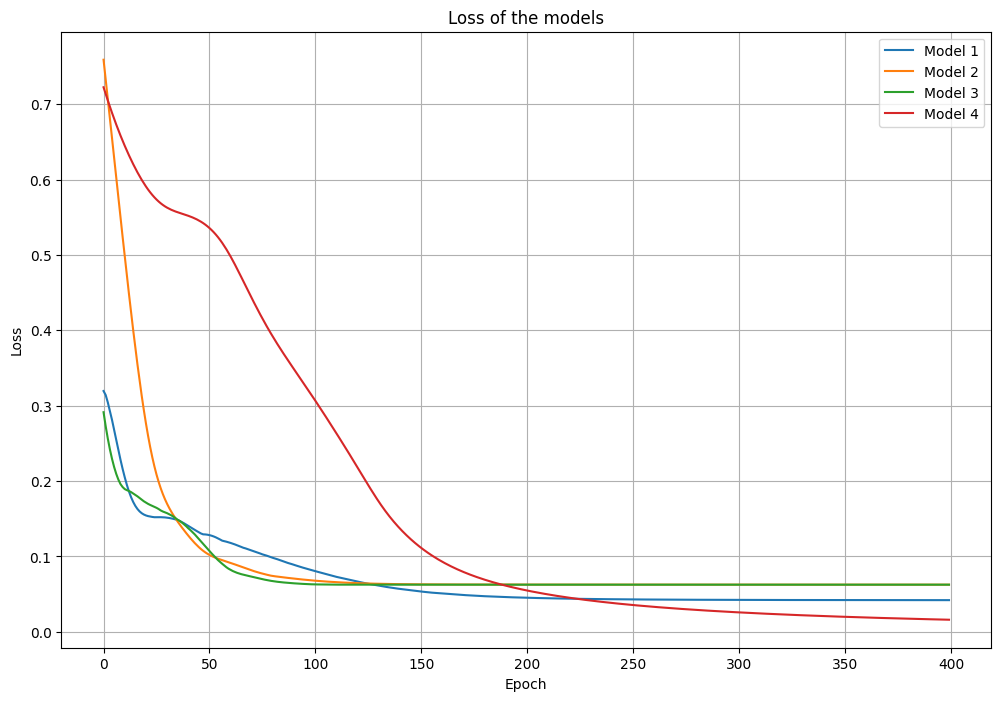

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(losses1, label='Model 1')
plt.plot(losses2, label='Model 2')
plt.plot(losses3, label='Model 3')
plt.plot(losses4, label='Model 4')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss of the models')
plt.grid(True)
plt.legend()
plt.show()